In [140]:
library(neuralnet)
library(ggplot2)
library(nnet)
library(dplyr)
library(reshape2)

In [141]:
library(caret)

In [142]:
df<- read.csv(file = "C:/q4.csv",header = TRUE,sep = ",")

In [143]:
newRow <- data.frame(x=5,y=9,Class='unowned')

In [144]:
df <- rbind(df,newRow)

In [145]:
newRow1 <- data.frame(x=5,y=10,Class='unowned')

In [146]:
df <- rbind(df,newRow1)

In [147]:
df

x,y,Class
10.5,5.0,unowned
7.5,6.0,unowned
2.0,5.0,owned
3.0,4.0,unowned
3.5,8.0,owned
6.5,6.5,owned
1.5,6.0,owned
6.5,8.0,owned
8.0,4.0,unowned
10.5,9.0,owned


In [148]:
labels <- class.ind(as.factor(df$Class))

In [149]:
f <- as.formula("unowned + owned ~ x + y")

In [150]:
standardiser <- function(x){
  (x-min(x))/(max(x)-min(x))
}

In [151]:
df[, 1:2] <- lapply(df[, 1:2], standardiser)

In [152]:
pre_process_class <- cbind(df[,1:2], labels)

In [153]:
pre_process_class

x,y,owned,unowned
1.00000000,0.1666667,0,1
0.66666667,0.3333333,0,1
0.05555556,0.1666667,1,0
0.16666667,0.0000000,0,1
0.22222222,0.6666667,1,0
0.55555556,0.4166667,1,0
0.00000000,0.3333333,1,0
0.55555556,0.6666667,1,0
0.72222222,0.0000000,0,1
1.00000000,0.8333333,1,0


In [139]:
f <- as.formula("unowned + owned ~ x + y")

In [154]:
class_net <- neuralnet(f, data =  pre_process_class, hidden = 1, act.fct = "tanh", linear.output = FALSE)

In [155]:
class_net$result.matrix

error,2.048156073
reached.threshold,0.007829364
steps,374.000000000
Intercept.to.1layhid1,2.294689798
x.to.1layhid1,-26.923579904
y.to.1layhid1,6.213850466
Intercept.to.unowned,0.360112907
1layhid1.to.unowned,-0.430740873
Intercept.to.owned,1.374403593
1layhid1.to.owned,1.031612424


In [156]:
library(tidyverse)
library(neuralnet)
library(GGally)

In [117]:
install.packages("GGally",repos = "http://cran.us.r-project.org")


also installing the dependencies 'prettyunits', 'progress', 'reshape'



package 'prettyunits' successfully unpacked and MD5 sums checked
package 'progress' successfully unpacked and MD5 sums checked
package 'reshape' successfully unpacked and MD5 sums checked
package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\Wondershare\CreatorTemp\RtmpcRGDR3\downloaded_packages


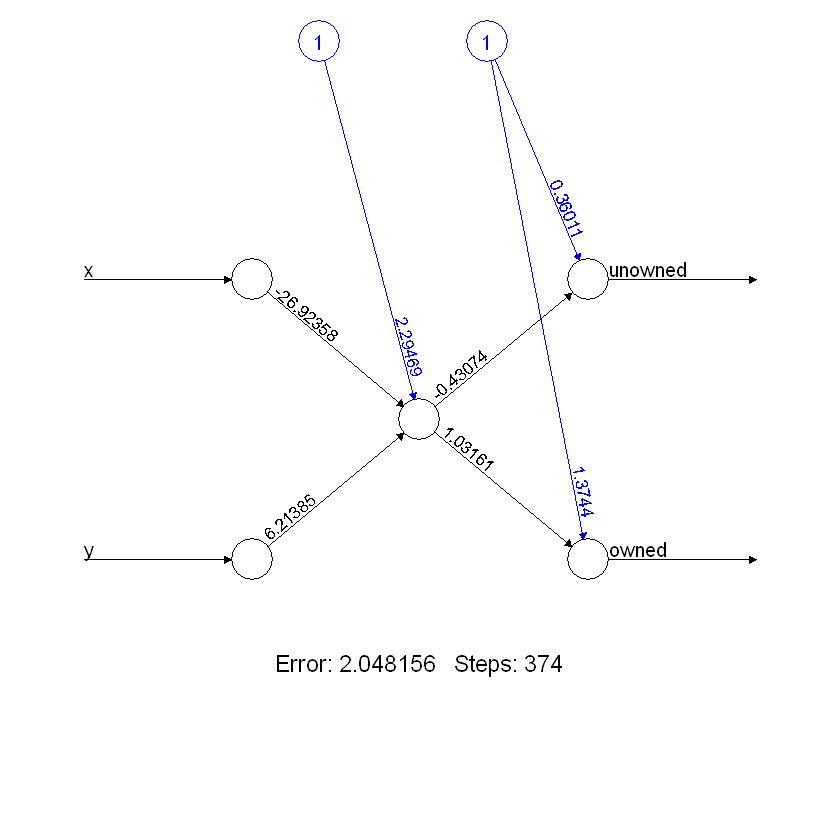

In [157]:
plot(class_net, rep = 'best')

In [124]:
# Compute predictions
compute(iris_net, pre_process_iris[, 1:2])

ERROR: Error in UseMethod("compute"): no applicable method for 'compute' applied to an object of class "nn"
